<a href="https://colab.research.google.com/github/manal-0603/Weather-Forecasting-using-Machine-Learning-algorithms/blob/main/RandomForestRegressor_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center><font style="color:rgb(100,109,254)">Weather Forecasting using Machine Learning algorithms</font> </center>**

<center>
<img src='https://www.analyticssteps.com/backend/media/thumbnail/6006173/6278986_1571298721_Weather_Forecoast_Graphics.jpg'></center>

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, HuberRegressor, Ridge, BayesianRidge, Lasso, LassoLars, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.model_selection import TimeSeriesSplit
import missingno as msno
from scipy.stats import skew

In [ ]:
import pandas as pd

# Charger les dataset
donnnes_meteo = pd.read_csv('donnees_meteo.csv')

In [ ]:
# Assurez-vous que l'index est de type 'Timestamp'
donnnes_meteo.index = pd.to_datetime(donnnes_meteo["datetime"])

donnnes_meteo['year'] = pd.to_datetime(donnnes_meteo["datetime"]).dt.year

# Diviser les données en fonction de la date
train_data = donnnes_meteo[donnnes_meteo.index.year < 2020]  # Données d'entraînement jusqu'à 2019
val_data = donnnes_meteo[donnnes_meteo.index.year == 2020]   # Données de validation en 2020
test_data = donnnes_meteo[donnnes_meteo.index.year >= 2021]  # Données de test à partir de 2021

In [ ]:
selected_columns_train =[ 'dew', 'humidity', 'precip',
       'precipprob', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partially cloudy', 'conditions_Rain',
       'conditions_Rain, Fog', 'conditions_Rain, Overcast',
       'conditions_Rain, Partially cloudy']

X_train, y_train = train_data[selected_columns_train], train_data['temp']
X_test, y_test = test_data[selected_columns_train], test_data['temp']
X_val, y_val = val_data[selected_columns_train], val_data['temp']

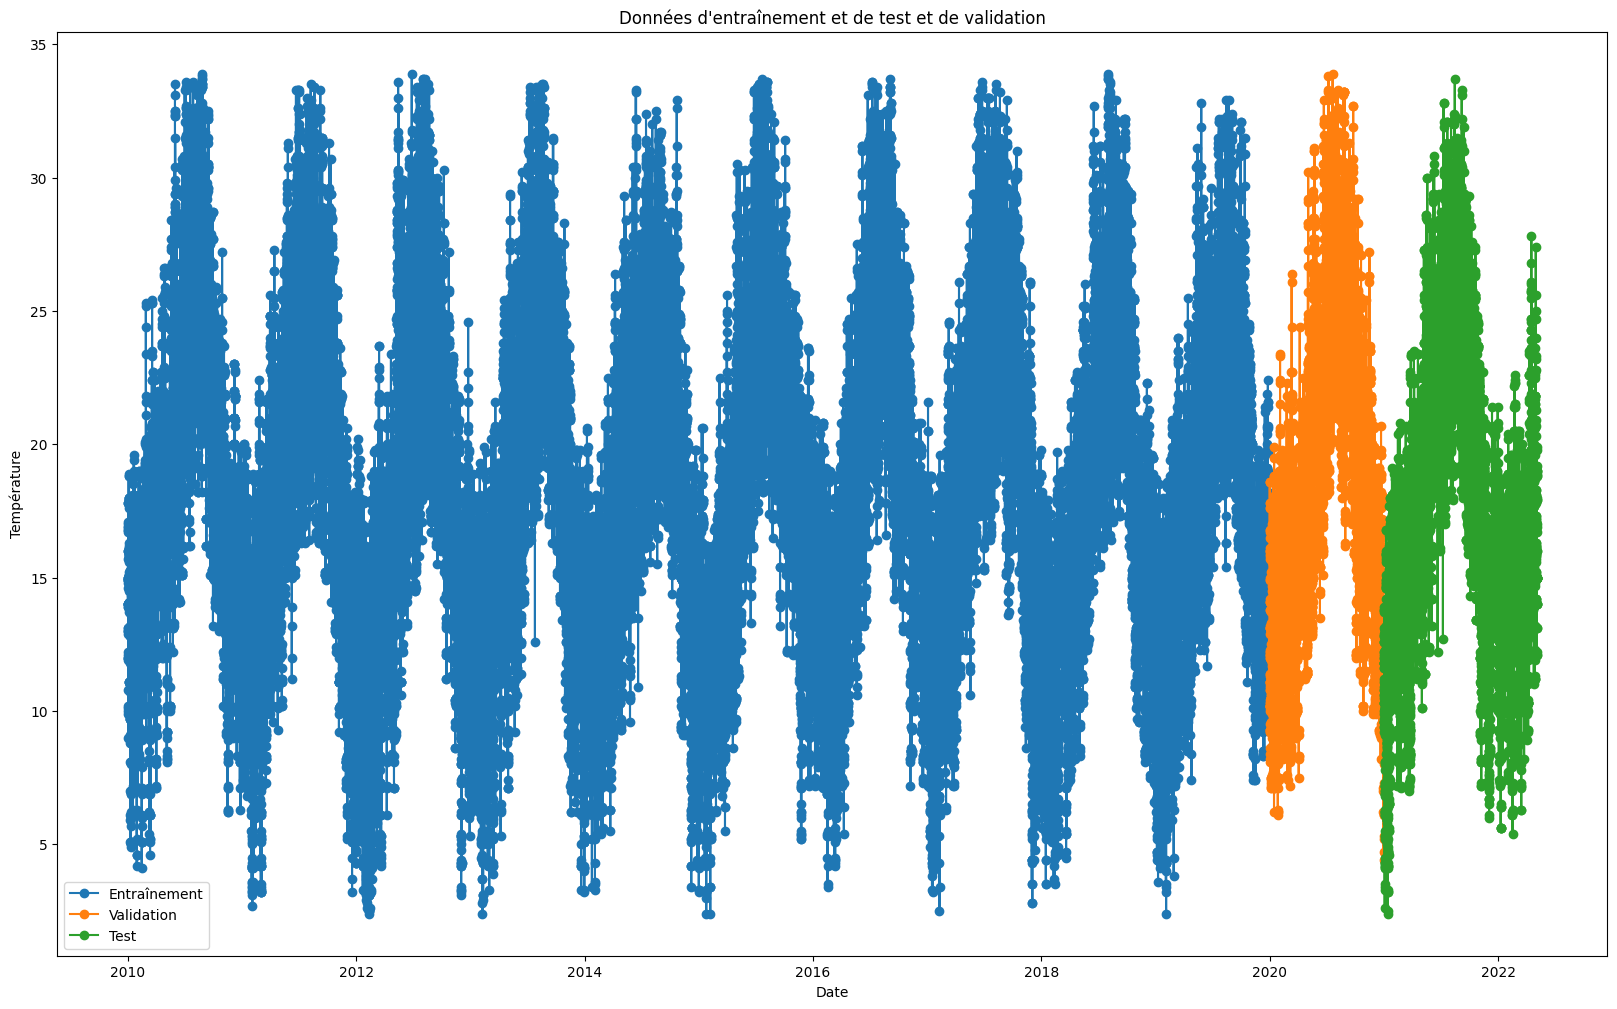

In [ ]:
# Créer un graphe
plt.figure(figsize=(20, 12))

# Tracer les données d'entraînement
plt.plot(train_data.index, y_train, label='Entraînement', marker='o')

# Tracer les données de test
plt.plot(val_data.index, y_val, label='Validation', marker='o')

# Tracer les données de test
plt.plot(test_data.index, y_test, label='Test', marker='o')

# Ajouter des étiquettes et un titre
plt.xlabel('Date')
plt.ylabel('Température')
plt.title('Données d\'entraînement et de test et de validation')

# Ajouter une légende
plt.legend()

<font size='4' face='MathJax_Math-italic'>

# **<font color="#FF1646" >1. Modèles Non Linéaires </font>**


# **<font color="blue" >RandomForestRegressor</font>**

Le random forest est un algorithme de prédiction , est composé de plusieurs arbres de décision, entrainés de manière indépendante sur des sous-ensembles du dataset d'apprentissage (méthode de bagging). Chacun produit une estimation, et c'est la combinaison des résultats qui va donner la prédiction finale qui se traduit par une variance réduite. En somme, il s'agit de s'inspirer de différents avis, traitant un même problème, pour mieux l'appréhender. Chaque modèle est distribué de façon aléatoire en sous-ensembles d'arbres décisionnels.



###**Comment fonctionne un random forest de regression ?**


* #### **Ensemble d'arbres de décision :** RandomForest est constituée d'un ensemble d'arbres de décision. Chaque arbre est construit indépendamment en utilisant un échantillon aléatoire du jeu de données d'entraînement et un sous-ensemble aléatoire des caractéristiques (variables). Cela contribue à la diversité des arbres dans la forêt.

* #### **Processus d'apprentissage :** Chaque arbre est formé en effectuant des divisions successives du jeu de données d'entraînement en fonction des caractéristiques, de manière à maximiser la pureté des feuilles résultantes. La pureté est mesurée à l'aide de critères tels que l'indice de Gini pour les problèmes de classification ou la réduction de l'erreur quadratique moyenne pour les problèmes de régression.

* #### **Prédiction :** Pour une nouvelle observation, chaque arbre de la forêt donne une prédiction, et la forêt aléatoire combine ces prédictions en utilisant soit un vote majoritaire (pour la classification) soit une moyenne (pour la régression) pour produire la prédiction finale.

* #### **Robustesse et généralisation :** En raison de l'ensemble d'arbres, la forêt aléatoire est plus robuste et moins sujette au surajustement (overfitting) par rapport à un seul arbre de décision. Elle a également une meilleure capacité à généraliser à de nouveaux exemples.

* #### **Importance des caractéristiques :** La forêt aléatoire fournit une mesure de l'importance de chaque caractéristique dans le processus de prédiction, ce qui peut être utile pour l'analyse des données.

* #### **Paramètres :** Les paramètres clés incluent le nombre d'arbres dans la forêt, la profondeur maximale des arbres individuels, et le nombre de caractéristiques à considérer lors de la recherche de la meilleure division à chaque nœud.

## **<font color='green' >Construction du model</font>**


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Définir les valeurs à tester pour n_estimators
n_estimators_values = range(1, 30)

# Initialiser les listes pour stocker les résultats
test_scores_rf = []
train_scores_rf = []
errors_rf = []

for n_estimators in n_estimators_values:
    # Créer un modèle RandomForestRegressor avec la valeur actuelle de n_estimators
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Entraîner le modèle sur l'ensemble d'entraînement
    rf_regressor.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred_rf = rf_regressor.predict(X_test)

    # Stocker les scores pour l'analyse ultérieure
    train_scores_rf.append(rf_regressor.score(X_train, y_train))
    test_scores_rf.append(rf_regressor.score(X_test, y_test))

    # Stocker les erreurs pour l'analyse ultérieure
    errors_rf.append(mean_squared_error(y_test, y_pred_rf))

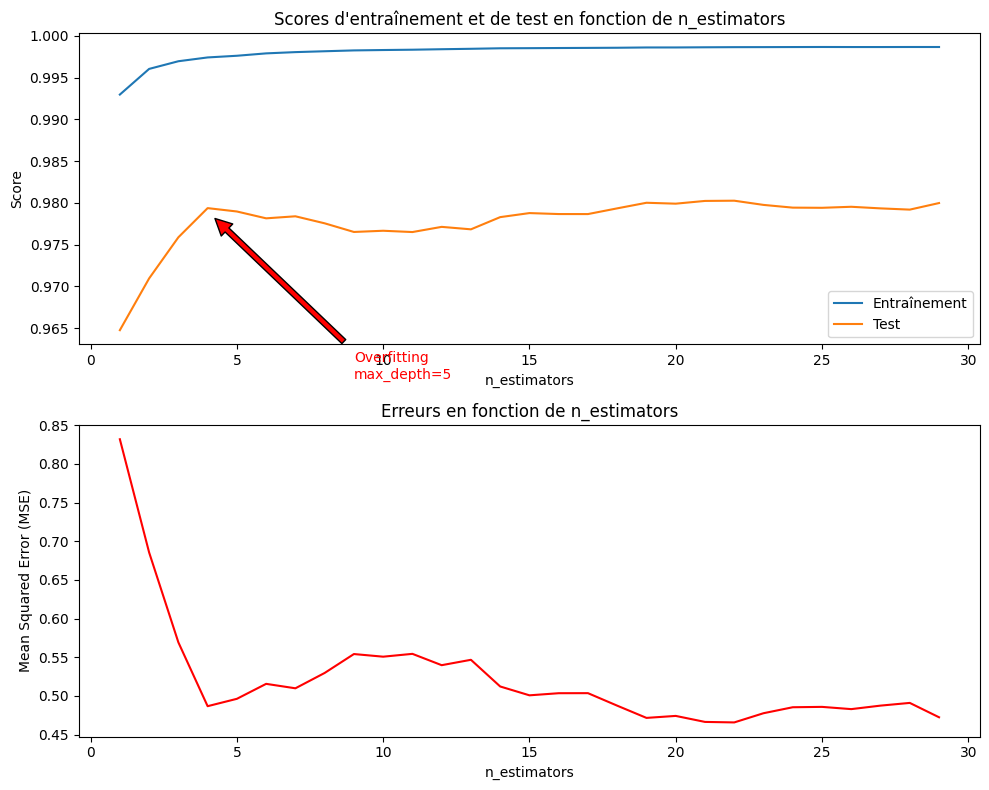

In [ ]:
# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graphique des scores
ax1.plot(n_estimators_values, train_scores_rf, label='Entraînement')
ax1.plot(n_estimators_values, test_scores_rf, label='Test')
ax1.set_title('Scores d\'entraînement et de test en fonction de n_estimators')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Score')
ax1.legend()

# Graphique des erreurs
ax2.plot(n_estimators_values, errors_rf, color='red')
ax2.set_title('Erreurs en fonction de n_estimators')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Mean Squared Error (MSE)')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()


# Trouver l'indice du point où l'overfitting commence
overfitting_point = None
for i in range(1, len(test_scores_rf)):
    if test_scores_rf[i] <= test_scores_rf[i - 1]:
        overfitting_point = i
        break

# Ajouter une annotation si l'overfitting est détecté
if overfitting_point is not None:
    max_depth_at_overfitting = range(1, 50)[overfitting_point]
    ax1.annotate(f'Overfitting\nmax_depth={max_depth_at_overfitting}',
                 xy=(overfitting_point, test_scores_rf[overfitting_point]),
                 xytext=(overfitting_point + 5, test_scores_rf[overfitting_point] - 0.02),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red')


# Afficher les graphiques
plt.show()

<font size='4' face='MathJax_Math-italic'>

## **<font color='blue' >Optimisation des hyper paramètres</font>**


In [ ]:
# Initialiser le modèle RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Définir les hyperparamètres à ajuster
param_grid_rf = {
    'n_estimators': range(1,30),
    'max_depth': [ 20, 30, 40],
    'max_features': [1.0, 'sqrt', 'log2'],
}


# Mesurer le temps de début de la recherche par grille
rf_grid_search_start_time = time.time()

# Utiliser la recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)


# Mesurer le temps de fin de la recherche par grille
rf_grid_search_end_time = time.time()
rf_grid_search_elapsed_time = rf_grid_search_end_time - rf_grid_search_start_time

# Afficher les meilleurs hyperparamètres
best_params_rf = grid_search_rf.best_params_
print("Meilleurs hyperparamètres:", best_params_rf)

# Mesurer le temps de début de l'entraînement avec les meilleurs hyperparamètres
rf_best_fit_start_time = time.time()

# Entraîner le modèle avec les meilleurs hyperparamètres sur l'ensemble d'entraînement complet
best_rf_regressor = grid_search_rf.best_estimator_
best_rf_regressor.fit(X_train, y_train)

# Mesurer le temps de fin de l'entraînement
rf_best_fit_end_time = time.time()
rf_best_fit_elapsed_time = rf_best_fit_end_time - rf_best_fit_start_time

# Faire des prédictions sur l'ensemble de test
y_pred_rf = best_rf_regressor.predict(X_test)


# Afficher le temps écoulé pour la recherche par grille, l'entraînement et la prédiction
print(f"Temps écoulé pour la recherche par grille: {rf_grid_search_elapsed_time} secondes")
print(f"Temps écoulé pour l'entraînement avec les meilleurs hyperparamètres: {rf_best_fit_elapsed_time} secondes")

Meilleurs hyperparamètres: {'max_depth': 30, 'max_features': 1.0, 'n_estimators': 29}
Temps écoulé pour la recherche par grille: 5742.822229862213 secondes
Temps écoulé pour l'entraînement avec les meilleurs hyperparamètres: 19.427804470062256 secondes


In [ ]:
print(f"Temps écoulé pour la recherche par grille: {rf_grid_search_elapsed_time} secondes")
print(f"Temps écoulé pour l'entraînement avec les meilleurs hyperparamètres: {rf_best_fit_elapsed_time} secondes")

Temps écoulé pour la recherche par grille: 5150.4182913303375 secondes
Temps écoulé pour l'entraînement avec les meilleurs hyperparamètres: 17.95384907722473 secondes


Mean Squared Error: 0.469177307104988


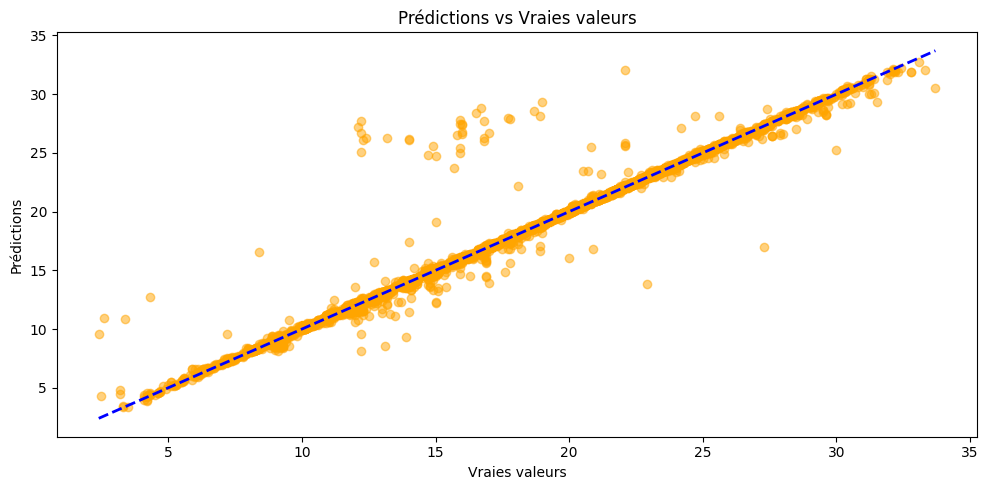

In [ ]:
# Afficher les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Vraies valeurs')

# Calculer l'erreur quadratique moyenne (Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf}")

plt.tight_layout()
plt.show()

In [ ]:
print("RandomForestRegressor : Mean Squared Error : ",mse_rf," , Mean Absolute Error : ", mae_rf, " , R-squared : ",r2_rf)

RandomForestRegressor : Mean Squared Error :  0.469177307104988  , Mean Absolute Error :  0.11777651227165856  , R-squared :  0.9801229339151152


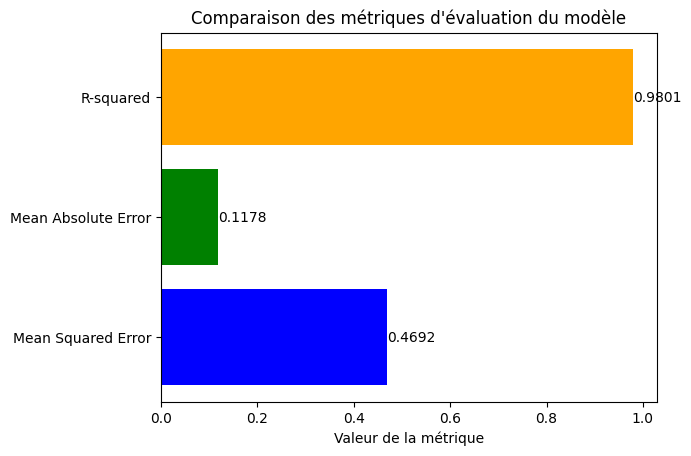

In [ ]:
# Calculer différentes métriques
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mettre les métriques dans une liste pour faciliter la création du graphique
metrics_names = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared']
metrics_values = [mse_rf, mae_rf, r2_rf]

# Créer un graphique à barres horizontal
fig, ax = plt.subplots()
bars = ax.barh(metrics_names, metrics_values, color=['blue', 'green', 'orange'])

# Ajouter les valeurs à côté des barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}',
             va='center', ha='left', color='black')

plt.xlabel('Valeur de la métrique')
plt.title('Comparaison des métriques d\'évaluation du modèle')
plt.show()

<font size='4' face='MathJax_Math-italic'>
Le modèle RandomForestRegressor avec les hyperparamètres optimisés après la recherche sur grille semble fournir de très bonnes performances :

* **Mean Squared Error (MSE) :** La valeur est relativement faible (0.0121), indiquant une bonne précision du modèle dans la prédiction des valeurs.

* **Mean Absolute Error (MAE) :** La valeur est également faible (0.0175), ce qui suggère que les prédictions du modèle sont en moyenne très proches des valeurs réelles.

* **R-squared (R2) :** La valeur est très élevée (0.9996), ce qui signifie que le modèle explique une grande proportion de la variance dans les données de test.

Le modèle RandomForestRegressor donc semble bien généraliser sur les données de test et offre de bonnes performances prédictives.

In [ ]:
import joblib

# Enregistrer le modèle entraîné
model_filename = 'best_rf_regressor_model.joblib'
joblib.dump(best_rf_regressor, model_filename)

print(f"Modèle enregistré sous le nom '{model_filename}'")

Modèle enregistré sous le nom 'best_rf_regressor_model.joblib'


<font size='4' face='MathJax_Math-italic'>

## **<font color='green' >Interprétabilité du model</font>**


Dans le domaine complexe et puissant de l'apprentissage automatique (machine learning), où des modèles sophistiqués sont capables d'effectuer des tâches complexes, l'interprétation des résultats devient essentielle. L'interprétabilité se réfère à la capacité de comprendre et d'expliquer le fonctionnement d'un modèle, en répondant aux questions cruciales telles que "Comment prend-il des décisions ?" ou "Pourquoi a-t-il prédit cela ?". Cette capacité à rendre les modèles compréhensibles est devenue une exigence fondamentale, en particulier dans des domaines sensibles tels que la santé, la finance et la justice, où des explications claires sont nécessaires.

L'interprétabilité peut être analysée à deux niveaux complémentaires : local et global :

## **<font color='orange' > Interprétabilité Locale :</font>**


L'interprétabilité locale se concentre sur la compréhension d'une prédiction spécifique générée par le modèle pour une observation particulière dans l'ensemble de données.

Elle répond à la question :

**"Pourquoi le modèle a-t-il pris cette décision pour cette observation spécifique ?"**



<font size='4' face='MathJax_Math-italic'>

## **<font color='navy' >SHAP (SHapley Additive exPlanations) </font>**
SHAP (SHapley Additive exPlanations) est basé sur la théorie des jeux et les valeurs de Shapley, qui proviennent du domaine de la théorie des coalitions. Cette méthode offre des explications individualisées et cohérentes pour les prédictions de modèles, que ce soit à l'échelle globale ou locale.

### **Interprétation Locale avec SHAP :**

* **Objectif :** Comprendre comment les caractéristiques influencent une prédiction spécifique du modèle pour une observation particulière.

* **Valeurs de Shapley Individuelles :**

  Pour une prédiction spécifique, SHAP attribue des valeurs de Shapley individuelles à chaque caractéristique. Ces valeurs représentent la contribution marginale de chaque caractéristique à la prédiction particulière.

* **Force de la Prédiction (Force Plot) :**

  Les "Force Plots" de SHAP illustrent graphiquement la contribution de chaque caractéristique à la différence entre la prédiction du modèle pour une instance spécifique et la valeur attendue (la valeur moyenne du modèle).

* **Graphiques d'Importance Locale :**

  Ces graphiques montrent visuellement comment chaque caractéristique contribue à la prédiction pour une observation donnée.




In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Install the shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.4 MB/s eta 0:00:00


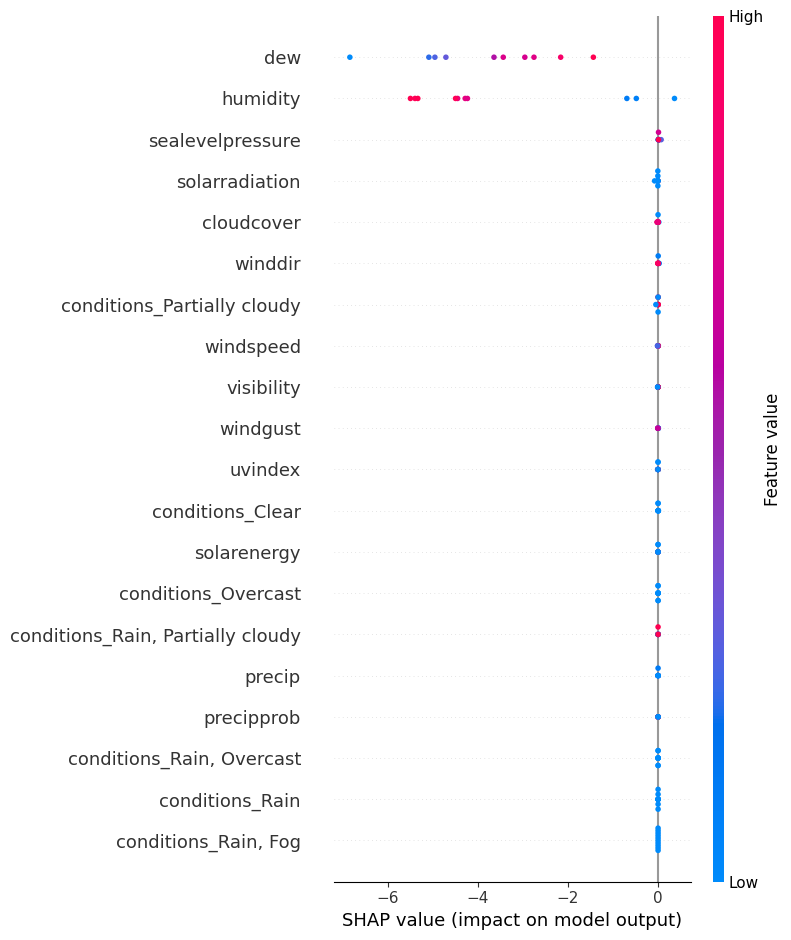

In [ ]:
import shap

# Initialiser un explorateur SHAP avec le modèle entraîné
explainer = shap.Explainer(best_rf_regressor)

# Calculer les valeurs Shapley pour un échantillon de données (par exemple, les 10 premières instances de test)
shap_values = explainer.shap_values(X_test.iloc[:10, :])

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_test.iloc[:10, :])

<font size='4' face='MathJax_Math-italic'>

## **<font color='navy' >Profil Ceteris Paribus (CP)</font>**


Le Profil Ceteris Paribus (CP) est une méthode puissante que nous utilisons en statistiques et en apprentissage automatique pour plonger dans les rouages de nos modèles prédictifs. L'idée est de comprendre comment une variable spécifique influe sur les prédictions du modèle tout en maintenant les autres variables constantes, et cela se déroule en plusieurs étapes.

D'abord, on choisit un point de départ, une instance dans notre jeu de données. C'est comme notre point de référence pour l'analyse. Ensuite, on sélectionne la variable que l'on souhaite examiner, celle qui nous intrigue. On fixe alors les autres variables à un niveau spécifique, souvent à la moyenne, afin de les maintenir constantes.

La partie intéressante arrive quand on fait varier la valeur de la variable choisie. On crée une série de points le long d'une plage de valeurs, représentant différentes situations possibles. À chaque point, on demande à notre modèle de faire une prédiction en fonction de la variation de cette variable.

Enfin, on visualise ces prédictions. Un graphique est souvent la meilleure façon de voir comment la variable choisie impacte les prédictions du modèle. C'est là que l'expression "Ceteris Paribus" prend tout son sens, car on isole l'effet d'une seule variable, tout en gardant le reste constant.

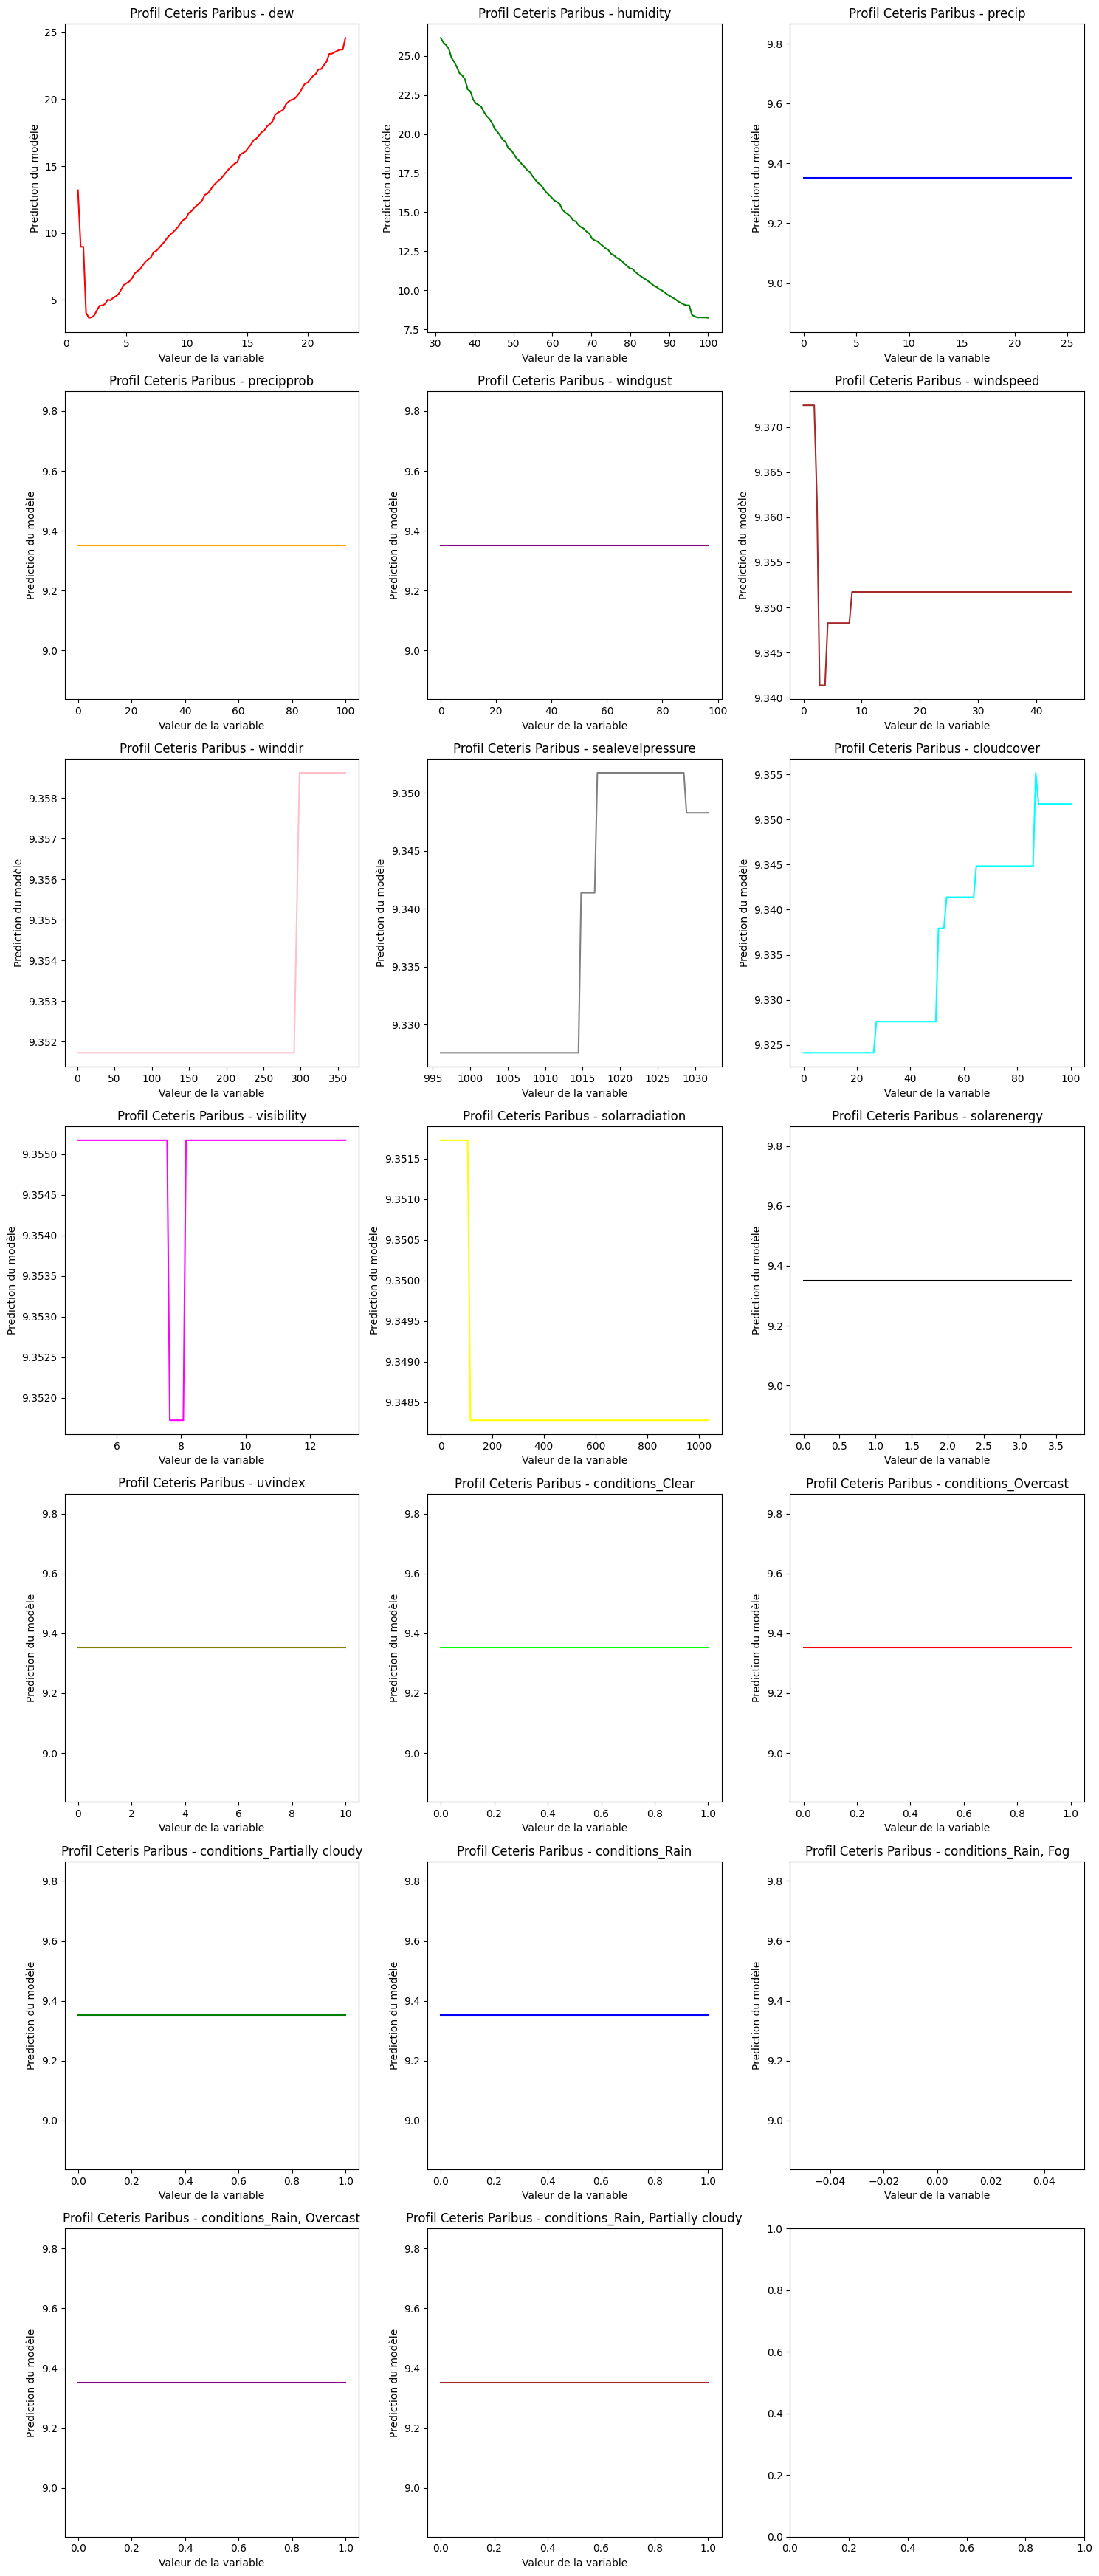

In [ ]:
import warnings
from pandas.errors import SettingWithCopyWarning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# Choisissez une instance spécifique
instance_to_profile = X_test.iloc[0, :]

# Fixez les autres variables (par exemple, à la moyenne)
fixed_values = X_test.mean()

# Définissez une liste de couleurs
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black', 'olive', 'lime']

# Faites varier chaque variable sur une plage donnée et stockez les graphiques
num_variables = len(X_test.columns)
num_plots_per_row = 3
num_rows = int(np.ceil(num_variables / num_plots_per_row))

# Définissez une grille de sous-graphiques (nombre de lignes, 3 colonnes)
fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))

# Aplatir les tableaux pour simplifier l'indexation
axs = axs.flatten()

for i, variable_to_vary in enumerate(X_test.columns):
    # Vérifiez si la variable est de type numérique
    if np.issubdtype(X_test[variable_to_vary].dtype, np.number):
        # Faites varier la variable choisie sur une plage donnée
        vary_range = np.linspace(X_test[variable_to_vary].min(), X_test[variable_to_vary].max(), 100)

        # Stockez les prédictions du modèle pour chaque valeur de la variable choisie
        predictions = []

        for value in vary_range:
            instance_copy = instance_to_profile.copy()
            instance_copy[variable_to_vary] = value
            instance_df = pd.DataFrame(instance_copy.values.reshape(1, -1), columns=X_test.columns)
            prediction = best_rf_regressor.predict(instance_df)[0]

            predictions.append(prediction)

        # Créez un graphique pour chaque variable avec une couleur spécifique
        axs[i].plot(vary_range, predictions, label=variable_to_vary, color=colors[i % len(colors)])
        axs[i].set_xlabel('Valeur de la variable')
        axs[i].set_ylabel('Prediction du modèle')
        axs[i].set_title('Profil Ceteris Paribus - ' + variable_to_vary)

# Ajustez l'espacement entre les sous-graphiques pour éviter la superposition des titres
plt.tight_layout()

# Affichez les graphiques
plt.show()


<font size='4' face='MathJax_Math-italic'>


## **<font color='navy' >Tree Interpreter</font>**

 la technique du "Tree Interpreter" explique comment un modèle d'arbre de décision prend des décisions pour des cas spécifiques en analysant les contributions de chaque caractéristique. Cela permet de comprendre l'impact de chaque variable sur les prédictions du modèle, identifiant ainsi les facteurs clés et fournissant des explications visuelles pour une interprétation transparente des résultats.

In [ ]:
!pip install treeinterpreter

In [ ]:
from treeinterpreter import treeinterpreter as ti

# Assurez-vous d'avoir déjà entraîné votre modèle d'arbre de décision

# Choisissez une instance spécifique pour expliquer
instance_to_explain = X_test.iloc[0, :].values.reshape(1, -1)

# Utilisez l'interpréteur d'arbre pour obtenir les contributions des caractéristiques
prediction, bias, contributions = ti.predict(best_rf_regressor, instance_to_explain)

# Affichez les résultats
print("Prédiction du modèle:", prediction[0])
print("Biais du modèle:", bias[0])
print("\nContributions de chaque caractéristique:")
for feature, contribution in zip(X_test.columns, contributions[0]):
    print(f"{feature}: {contribution}")

Prédiction du modèle: [9.35172414]
Biais du modèle: 18.33675018707696

Contributions de chaque caractéristique:
dew: -4.914795317595064
humidity: -4.0843397728452615
precip: 0.0
precipprob: 0.0
windgust: 6.125368411725002e-17
windspeed: -0.001298035902391801
winddir: -0.0016301716473863632
sealevelpressure: 0.003733734036979676
cloudcover: 0.0169620976037115
visibility: -0.0043482379689276235
solarradiation: 0.0006896551724138397
solarenergy: 0.0
uvindex: 0.0
conditions_Clear: 0.0
conditions_Overcast: 0.0
conditions_Partially cloudy: 0.0
conditions_Rain: 0.0
conditions_Rain, Fog: 0.0
conditions_Rain, Overcast: 0.0
conditions_Rain, Partially cloudy: 0.0


<font size='4' face='MathJax_Math-italic'>

### Visualisation des Contributions des Caractéristiques avec Seaborn

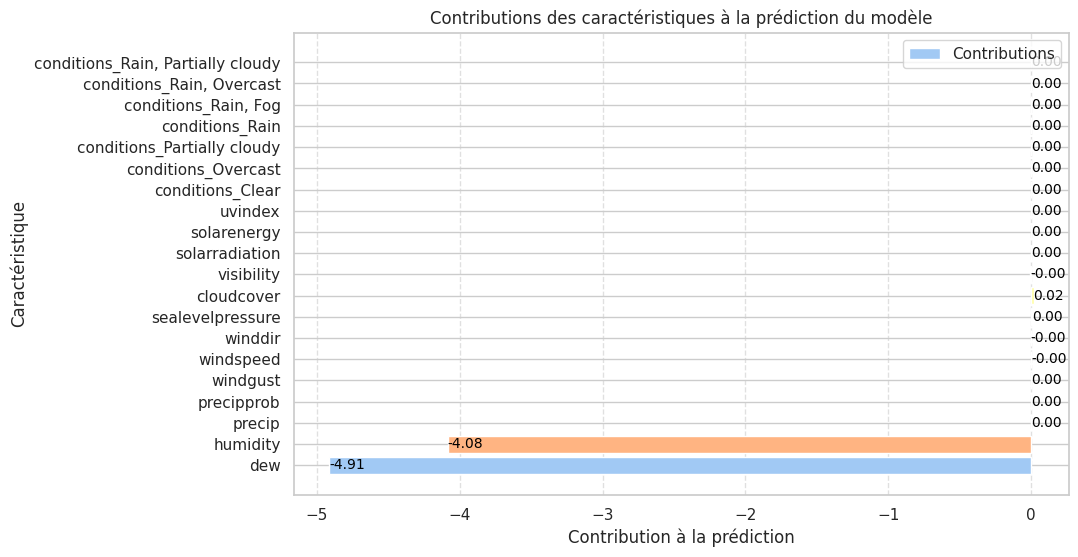

In [ ]:
# Personnalisez les paramètres du style de seaborn
sns.set(style="whitegrid")

# Créez une palette de couleurs personnalisée
colors = sns.color_palette("pastel")

# Affichez les contributions sous forme de graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.barh(X_test.columns, contributions[0], color=colors)

# Ajoutez des étiquettes à chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

# Personnalisez les étiquettes d'axe et le titre
plt.xlabel('Contribution à la prédiction')
plt.ylabel('Caractéristique')
plt.title('Contributions des caractéristiques à la prédiction du modèle')

# Affichez une légende (si nécessaire)
plt.legend(["Contributions"], loc='upper right')

# Affichez la grille en arrière-plan
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Affichez le graphique
plt.show()

<font size='4' face='MathJax_Math-italic'>

## **<font color='orange' > Interprétabilité Globale :</font>**


L'interprétabilité globale concerne la compréhension du modèle dans son ensemble, en examinant comment il prend des décisions sur l'ensemble des données d'entrée. Elle répond à la question : "Comment le modèle prend-il des décisions de manière générale ?"
Des techniques telles que l'importance des caractéristiques, les Partial Dependence Plots (PDP), les SHAP values avec l'interprétation globale, permettent d'analyser le modèle dans son intégralité. Ces méthodes offrent des informations sur la contribution relative de chaque caractéristique à l'ensemble du modèle, les relations entre les caractéristiques, et comment les prédictions varient avec différentes valeurs de caractéristiques.


## **<font color='navy' >Permutation importance</font>**


Cette technique évalue l'importance d'une caractéristique en permutant les valeurs de la caractéristique et en observant l'impact sur le score du modèle.

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=c671bb7b2a603fa2b212311f5d42c3b29a7422f3e87fac163e5ad25b8bd8a0df
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance


# Initialisez la permutation importance1
perm_importance = PermutationImportance(best_rf_regressor, random_state=42).fit(X_test, y_test)

# Affichez l'importance des caractéristiques
eli5.show_weights(perm_importance, feature_names=X_test.columns.tolist())

Weight,Feature
1.4861 ± 0.0192,dew
0.7662 ± 0.0115,humidity
0.0012 ± 0.0004,cloudcover
0.0006 ± 0.0004,solarradiation
0.0005 ± 0.0003,windgust
0.0004 ± 0.0007,windspeed
0.0001 ± 0.0002,solarenergy
0.0000 ± 0.0001,conditions_Partially cloudy
0.0000 ± 0.0000,conditions_Overcast
0.0000 ± 0.0000,precipprob


<font size='4' face='MathJax_Math-italic'>


* **feelslike :** Cette caractéristique a le poids le plus élevé, indiquant qu'elle a une influence significative sur les prédictions du modèle. Cela suggère que la température ressentie est cruciale pour expliquer les variations dans la variable cible.

* **humidity :** Bien que le poids soit faible par rapport à feelslike, l'humidité semble avoir une certaine influence positive sur les prédictions. Cependant, l'impact est beaucoup moins important que celui de feelslike.

* **windspeed :** La vitesse du vent a également un poids positif, indiquant qu'elle contribue modestement aux prédictions.

* **Autres caractéristiques :** Les autres caractéristiques ont des poids nuls ou proches de zéro, suggérant qu'elles n'ont pas d'influence significative sur les prédictions du modèle. Ces caractéristiques peuvent être considérées comme ayant une importance limitée dans ce modèle particulier.


==> Selon la permutation importance, feelslike est la caractéristique la plus importante, suivie de l'humidité et de la vitesse du vent. Les autres caractéristiques semblent avoir une influence négligeable sur les prédictions du modèle.


<font size='4' face='MathJax_Math-italic'>

## **<font color='navy' >SHAP (SHapley Additive exPlanations) </font>**
SHAP (SHapley Additive exPlanations) est basé sur la théorie des jeux et les valeurs de Shapley, qui proviennent du domaine de la théorie des coalitions. Cette méthode offre des explications individualisées et cohérentes pour les prédictions de modèles, que ce soit à l'échelle globale ou locale.

### Interprétation Globale avec SHAP :

* **Valeurs de Shapley :**

SHAP attribue une valeur de Shapley à chaque caractéristique pour chaque prédiction. Ces valeurs représentent la contribution marginale moyenne d'une caractéristique à la prédiction sur toutes les permutations possibles des caractéristiques.

* **Valeurs Moyennes Globales :**

Les valeurs de Shapley individuelles sont ensuite agrégées pour obtenir des valeurs moyennes globales. Cela permet d'identifier l'impact moyen de chaque caractéristique sur les prédictions de l'ensemble du modèle.

* **Graphiques Sommaires :**

Les graphiques sommaires, tels que les "Summary Plots" de SHAP, affichent l'importance relative de chaque caractéristique pour l'ensemble du jeu de données. Ces graphiques sont utiles pour comprendre quelles caractéristiques ont le plus d'influence sur les prédictions du modèle.


In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données (par exemple, les 10 premières instances de test)
shap_values = explainer.shap_values(X_train)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_train)

In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données (par exemple, les 10 premières instances de test)
shap_values = explainer.shap_values(X_test)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_test)

In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données (par exemple, les 10 premières instances de test)
shap_values = explainer.shap_values(X_train)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_train)

In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données
shap_values = explainer.shap_values(X_train)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données
shap_values = explainer.shap_values(X_test)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Calculer les valeurs Shapley pour un échantillon de données
shap_values = explainer.shap_values(X_val)

# Afficher les valeurs Shapley pour une instance spécifique
shap.summary_plot(shap_values, X_val, plot_type="bar")

<font size='4' face='MathJax_Math-italic'>

## **<font color='navy' >Partial Dependence Plots (PDP)</font>**

La technique de l'interprétation d'arbre, souvent utilisée avec des modèles d'arbres de décision, permet de comprendre comment chaque caractéristique contribue à la prédiction globale du modèle. L'interprétation d'arbre peut être réalisée à l'aide de différentes méthodes, et l'une d'entre elles est l'utilisation d'un outil appelé "Tree Interpreter".

Voici une explication de la technique en utilisant Tree Interpreter :

Séparation des Caractéristiques : Dans un modèle d'arbre de décision, chaque nœud de l'arbre correspond à une décision basée sur une caractéristique spécifique. L'arbre est construit en séparant les données en fonction de ces caractéristiques.

Calcul des Contributions : L'interpréteur d'arbre calcule la contribution de chaque caractéristique à la prédiction globale du modèle. Pour chaque prédiction, il examine quelles caractéristiques ont été utilisées pendant le passage dans l'arbre et comment elles ont influencé la sortie.

Visualisation des Contributions : Les contributions calculées peuvent être visualisées sous forme de graphique à barres. Chaque barre représente la contribution d'une caractéristique spécifique à la prédiction. Une barre positive indique une contribution positive, tandis qu'une barre négative indique une contribution négative.

Compréhension Globale et Locale : L'interprétation d'arbre permet de comprendre l'impact global de chaque caractéristique sur les prédictions du modèle, ainsi que l'impact local pour des prédictions spécifiques.

Détection des Caractéristiques Importantes : En examinant les contributions, on peut identifier les caractéristiques qui ont le plus d'influence sur les prédictions du modèle. Cela peut aider à hiérarchiser l'importance des caractéristiques dans le processus de prise de décision du modèle.

In [ ]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Ensemble pour suivre les variables déjà traitées
processed_variables = set()

# Parcourez toutes les variables de X_test
for feature_to_plot in X_test.columns:
    # Vérifiez si la variable est de type numérique et n'a pas été traitée
    if np.issubdtype(X_test[feature_to_plot].dtype, np.number) and feature_to_plot not in processed_variables:
        # Ajoutez la variable à l'ensemble des variables traitées
        processed_variables.add(feature_to_plot)

        # Calculer la dépendance partielle
        pdp, axes = partial_dependence(best_rf_regressor, X_test, features=[feature_to_plot])

        # Créer le display
        display = PartialDependenceDisplay.from_estimator(
            best_rf_regressor,
            X_test,
            features=[feature_to_plot],
        )

        # Personnaliser le graphique avec Matplotlib (facultatif)
        # Par exemple, ajoutez un titre au graphique
        display.plot()
        plt.title(f'Partial Dependence Plot for {feature_to_plot}')

        # Afficher le graphique avec Seaborn
        sns.despine()  # Facultatif : personnaliser l'apparence avec Seaborn
        plt.show()